# Acquisition

**4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.**

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables

In [7]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
import itertools
import acquire

np.random.seed(95)

In [8]:
iris = sns.load_dataset("iris")
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [9]:
iris.shape # look at the shape of that data

(150, 5)

In [10]:
iris.columns # look at the columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
iris.dtypes # looke at the data types of each column

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [12]:
iris.describe() # discriptive statistics

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**5. Read the data from this google sheet into a dataframe, df_google.**

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [13]:
# import form google sheets
action = "/export?format=csv&gid="
url = f"https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g{action}341089357"

google_sheet_data = pd.read_csv(url)

In [14]:
google_sheet_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [15]:
# select only integer datatypes
google_sheet_data_num_col = google_sheet_data.select_dtypes("number")

# remove the paragerid 
google_sheet_data_numerics = google_sheet_data[google_sheet_data_num_col.columns[1:]]
google_sheet_data_numerics.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [16]:
google_sheet_data.shape # look at the shape of the data

(891, 12)

In [17]:
google_sheet_data.columns # look at all the columns of the data

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
google_sheet_data.dtypes # look at the data types of the data

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [19]:
google_sheet_data.describe() # discriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.**

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

**To excel**

In [20]:
google_sheet_data.to_csv("google_sheet_data.csv") # transfer the previous data to csv


**remove utf-8**

In [21]:
def catch_encoding_errors(fileName) -> str:
    
    """
    parameters:
        fileName: csv file name. Should look like (file.csv)
    return:
        file dataframe with no encoding errors
    """
    # import needed
    from pandas import read_csv
    
    # list of encodings to check for
    encodings = ['utf-8', 'latin-1', 'cp1252', 'utf-16']
    
    # check encodings and return dataframe
    for encoding in encodings:
        try:
            df = pd.read_csv(fileName, encoding=encoding)
            break
        except UnicodeDecodeError:
            print(f"Failed to decode with {encoding} encoding.")
    return df

def get_existing_csv_file(fileName) -> str:
    """
    parameters:
        fileName: csv file name. Should look like (file.csv)
    return:
        file dataframe with no encoding errors after cheking for existance of file
    """
    if os.path.isfile(fileName):
        return catch_encoding_errors(fileName)
    else:
        print(f"file with name {fileName} does not exist.")

In [22]:
df = get_existing_csv_file("google_sheet_data.csv") # read existing csv files

# get a sample from the data frame
df_excel_sample= df.sample(100)
df_excel_sample.head(3)


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
348,348,349,1,3,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.900,NaN,S
432,432,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",female,42.0,1,0,SC/AH 3085,26.000,NaN,S
104,104,105,0,3,"Gustafsson, Mr. Anders Vilhelm",male,37.0,2,0,3101276,7.925,NaN,S


In [23]:
df.shape

(891, 13)

In [24]:
df_excel_sample.select_dtypes("object").columns # columns of the sample data frme

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [25]:
# get numeric columns from the data frame
df_excel_sample_num_cols =df_excel_sample.select_dtypes("number")

# get ranges from the numeric smale columns
ranges = df_excel_sample_num_cols.max(axis=0) - df_excel_sample_num_cols.min(axis=0)
ranges

Unnamed: 0     885.000
PassengerId    885.000
Survived         1.000
Pclass           2.000
Age             64.080
SibSp            4.000
Parch            5.000
Fare           227.525
dtype: float64

### Section 2

**Make a new python module, acquire.py to hold the following data aquisition functions:**

1. Make a function named get_titanic_data that returns the titanic data from the codeup data science database as a pandas data frame. Obtain your data from the Codeup Data Science Database.

In [26]:
titanic = acquire.get_titanic_data()

In [27]:
titanic.head()

AttributeError: 'tuple' object has no attribute 'head'

2. Make a function named get_iris_data that returns the data from the iris_db on the codeup data science database as a pandas data frame. The returned data frame should include the actual name of the species in addition to the species_ids. Obtain your data from the Codeup Data Science Database.

In [ ]:
iris = acquire.get_iris_data()
iris.head()

3. Make a function named get_telco_data that returns the data from the telco_churn database in SQL. In your SQL, be sure to join contract_types, internet_service_types, payment_types tables with the customers table, so that the resulting dataframe contains all the contract, payment, and internet service options. Obtain your data from the Codeup Data Science Database.

In [ ]:
telco_churn = acquire.get_telco()
telco_churn.head()

4. Once you've got your get_titanic_data, get_iris_data, and get_telco_data functions written, now it's time to add caching to them. To do this, edit the beginning of the function to check for the local filename of telco.csv, titanic.csv, or iris.csv. If they exist, use the .csv file. If the file doesn't exist, then produce the SQL and pandas necessary to create a dataframe, then write the dataframe to a .csv file with the appropriate name.

In [31]:
def get_csv_from_codeup_database_(fileName, database_name= None, query= None) -> "str, str, str":
    """
    parameters:
        fileName: csv file name. Should look like (file.csv)
        database_name: optional paremeter if file already exist in the working directorry
        query: optional paremeter tha contains sql query you wish to retreive from the data codeup databse
    return:
        file dataframe with no encoding errors after cheking for existance of file
    """
    import env
    
    if os.path.isfile(fileName):
        return catch_encoding_errors(fileName)
    else:
        # read the SQL query into a dataframe
        df = pd.read_sql(query, env.get_db_access(database_name))

        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(fileName)

        # Return the dataframe to the calling code
        return df  

In [32]:
query = """
    SELECT *
    FROM species;
    """
get_csv_from_codeup_database_("iris.csv", "iris_db", query)

,Unnamed: 0,species_id,species_name
0,0,1,setosa
1,1,2,versicolor
2,2,3,virginica


In [33]:
query = """
    SELECT *
    FROM customers #payment_types
    JOIN contract_types ct USING(contract_type_id)
    JOIN internet_service_types ist USING(internet_service_type_id)
    JOIN payment_types pt USING(payment_type_id);
    """
get_csv_from_codeup_database_("telco.csv", "telco_churn", query).head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [34]:
 query = """
    SELECT *
    FROM passengers;
    """

get_csv_from_codeup_database_("titanic.csv", "titanic_db", query).head()

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [35]:
get_csv_from_codeup_database_("titanic.csv").head(2)

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


# Prepare

In [2]:
import numpy as np
import pandas as pd
import acquire
import prepare
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Iris

- Use the function defined in acquire.py to load the iris data.

- Drop the species_id and measurement_id columns.

- Rename the species_name column to just species.

- Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

- Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applie

In [2]:
iris = acquire.get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [3]:
print("original colums:", len(iris.columns))

# Drop the species_id and measurement_id columns.
iris = iris.drop(columns=["species_id"])

print("\nnew colums:", len(iris.columns))

original colums: 8

new colums: 6


In [4]:
# Rename the species_name column to just species.
iris = iris.rename(columns={"species_name":"species"})
iris.head(1)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa


In [5]:
# get dummy variables
get_dummies = pd.get_dummies(iris.species, drop_first=True)

get_dummies.head(3)

,versicolor,virginica
0,0,0
1,0,0
2,0,0


In [6]:
# Concatenate dummies to the iris dataframe.
iris = pd.concat([iris,get_dummies], axis=1)
iris.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,0,0
1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,3,4.7,3.2,1.3,0.2,setosa,0,0


**Function**

In [7]:
# Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

def prep_iris():
    iris = acquire.get_iris_data()
    
    # Drop the species_id and measurement_id columns.
    iris = iris.drop(columns=["species_id"])
    
    # Rename the species_name column to just species.
    iris = iris.rename(columns={"species_name":"species"})
    
    # get dummy variables
    get_dummies = pd.get_dummies(iris.species, drop_first=True)
    
    # Concatenate dummies to the iris dataframe.
    iris = pd.concat([iris,get_dummies], axis=1)
    return iris
    

In [9]:
# check for resilt of prepare file
prepare.prep_iris().head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species,versicolor,virginica
0,1,5.1,3.5,1.4,0.2,setosa,0,0
1,2,4.9,3.0,1.4,0.2,setosa,0,0
2,3,4.7,3.2,1.3,0.2,setosa,0,0
3,4,4.6,3.1,1.5,0.2,setosa,0,0
4,5,5.0,3.6,1.4,0.2,setosa,0,0


## Titanic

- Use the function defined in acquire.py to load the Titanic data.

- Drop any unnecessary, unhelpful, or duplicated columns.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [23]:
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [24]:
titanic.info() # get info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [25]:
# separeate numeric from object data types and get columns names
numeric_titanic = titanic.select_dtypes("number").columns
numeric_titanic

Index(['passenger_id', 'survived', 'pclass', 'age', 'sibsp', 'parch', 'fare',
       'alone'],
      dtype='object')

SURVIVED
0    549
1    342
Name: survived, dtype: int64
0    0.616162
1    0.383838
Name: survived, dtype: float64


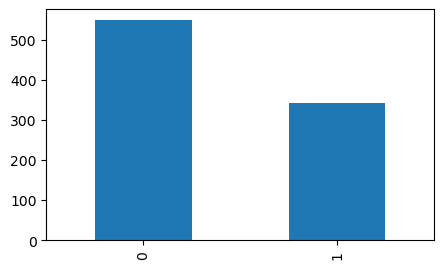


PCLASS
3    491
1    216
2    184
Name: pclass, dtype: int64
3    0.551066
1    0.242424
2    0.206510
Name: pclass, dtype: float64


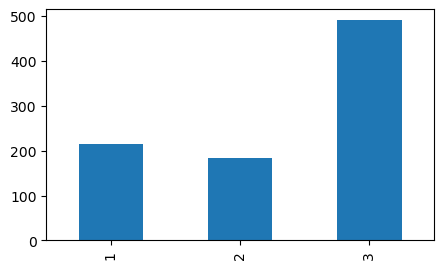


AGE
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: age, Length: 89, dtype: int64
24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: age, Length: 88, dtype: float64


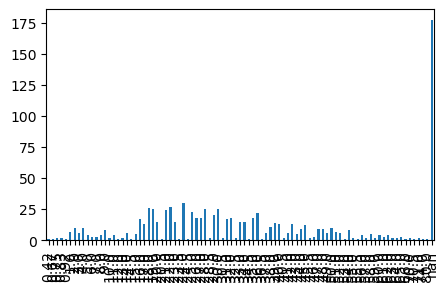


SIBSP
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64


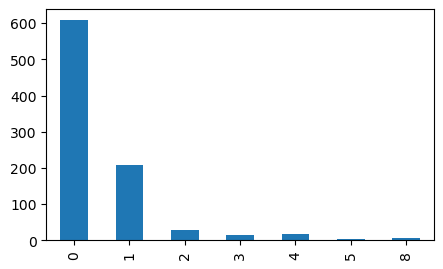


PARCH
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64


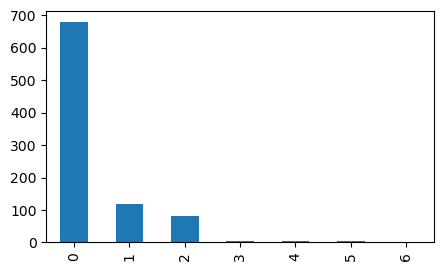


FARE
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: fare, Length: 248, dtype: int64
8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: fare, Length: 248, dtype: float64


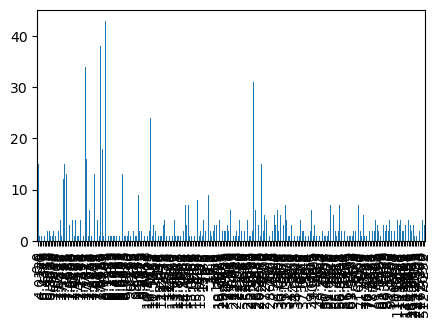


ALONE
1    537
0    354
Name: alone, dtype: int64
1    0.602694
0    0.397306
Name: alone, dtype: float64


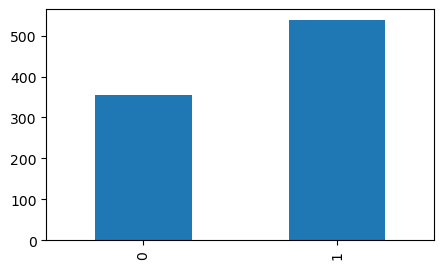

In [26]:
# print value counts for all the numeric columns
for col in numeric_titanic[1:]:
    plt.figure(figsize=(5,3))
    print(col.upper())
    print(titanic[col].value_counts(dropna=False))
    print(titanic[col].value_counts(normalize=True))
    titanic[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

In [27]:
# separeate numeric from object data types and get columns names
object_titanic = titanic.select_dtypes("object").columns
object_titanic

Index(['sex', 'embarked', 'class', 'deck', 'embark_town'], dtype='object')

SEX
male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64


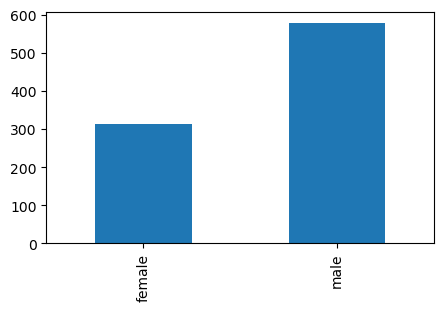


EMBARKED
S       644
C       168
Q        77
None      2
Name: embarked, dtype: int64
S    0.724409
C    0.188976
Q    0.086614
Name: embarked, dtype: float64


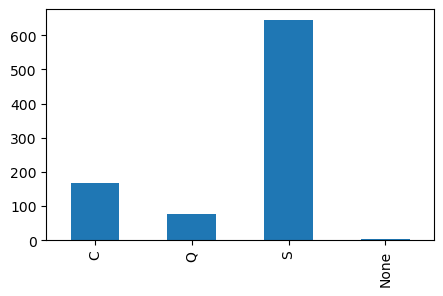


CLASS
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64


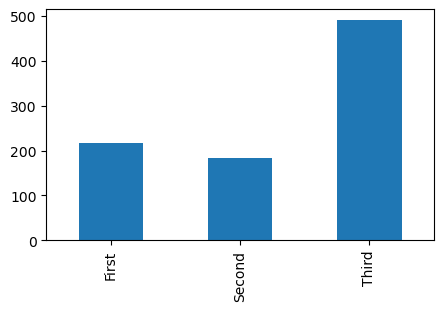


DECK
None    688
C        59
B        47
D        33
E        32
A        15
F        13
G         4
Name: deck, dtype: int64
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64


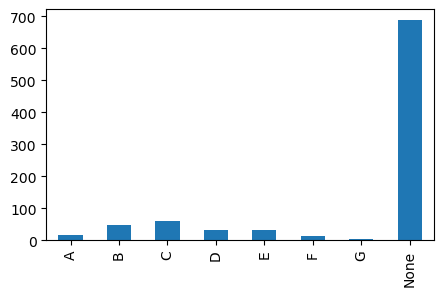


EMBARK_TOWN
Southampton    644
Cherbourg      168
Queenstown      77
None             2
Name: embark_town, dtype: int64
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64


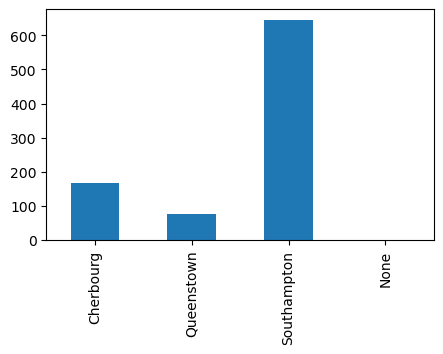

In [28]:
# print value counts for all the numeric columns
for col in object_titanic:
    plt.figure(figsize=(5,3))
    print(col.upper())
    print(titanic[col].value_counts(dropna=False))
    print(titanic[col].value_counts(normalize=True))
    titanic[col].value_counts(dropna=False).sort_index().plot.bar()
    plt.show()
    print()

In [29]:
# compare pclass colum to class colum to see if they are duplicates
pd.crosstab(titanic.pclass,titanic["class"]) 

# result shows that the are duplicates, so I will remove the class column from the dataframe

class,First,Second,Third
pclass,,,
1,216,0,0
2,0,184,0
3,0,0,491


In [30]:
# drop the class column from the dataframe becuase it is a cuplicate column
# drop duplicates and un necessery columns
drop_cols = ["class", "deck", "embark_town"]
titanic = titanic.drop(columns=drop_cols, axis=1)

titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,1,female,38.0,1,0,71.2833,C,0
2,2,1,3,female,26.0,0,0,7.9250,S,1


In [31]:
# check for duplicates in passenger_id
titanic.passenger_id.duplicated().sum()

0

In [35]:
# separeate numeric from object data types and get columns names
object_titanic = titanic.select_dtypes("object").columns

# make dummies for all categorical variables
all_dummies = pd.get_dummies(titanic[object_titanic], drop_first=True)
all_dummies.head()

,sex_male,embarked_Q,embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [37]:
# concate the dummies back to the data frame
titanic = pd.concat([titanic, all_dummies], axis=1)
titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1


**Function**

In [38]:
def prep_titanic(df):
    '''
    This function will clean the the titanic dataset
    '''
    # data
    titanic = acquire.get_titanic_data()
    
    # drop the class column from the dataframe becuase it is a cuplicate column
    # drop duplicates and un necessery columns
    drop_cols = ["class", "deck", "embark_town"]
    titanic = titanic.drop(columns=drop_cols, axis=1)
    
    # separeate numeric from object data types and get columns names
    object_titanic = titanic.select_dtypes("object").columns

    # make dummies for all categorical variables
    all_dummies = pd.get_dummies(titanic[object_titanic], drop_first=True)
    
    # concate the dummies back to the data frame
    titanic = pd.concat([titanic, all_dummies], axis=1)
    
    return titanic

In [3]:
prepare.prep_titanic().head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S
0,0,0,3,male,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,C,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,S,1,0,0,1


## Telco

- Use the function defined in acquire.py to load the Telco data.

- Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

- Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

- Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [60]:
telco = acquire.get_telco()
telco.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [61]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [62]:
# remove the non numerics in the total charges from data frame
print("original size:",len(telco))
telco = telco[telco.total_charges.str.contains(" ") == False]
print("new size:",len(telco))

original size: 7043
new size: 7032


In [63]:
# change the data type of total charges
telco.total_charges = telco.total_charges.astype("float")
telco.total_charges.dtype

dtype('float64')

In [64]:
# separe the custmer id column into two coumns
telco[["new_customer_id", "customer_id_category"]] = telco.customer_id.str.split("-", expand=True)
telco.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,new_customer_id,customer_id_category
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,0002,ORFBO
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,0003,MKNFE


In [66]:
print("origin col len:", len(telco.columns))
telco = telco.drop(columns="customer_id", axis=1)
print("new col len:", len(telco.columns))

origin col len: 26
new col len: 25


In [70]:
telco.new_customer_id = telco.new_customer_id.astype("int")
telco.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,new_customer_id,customer_id_category
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,No,Yes,65.6,593.3,No,One year,DSL,Mailed check,2,ORFBO
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check,3,MKNFE


In [71]:
# separate numeric from object columns
numeric_telco = telco.select_dtypes("number").columns
numeric_telco

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'tenure', 'monthly_charges', 'total_charges',
       'new_customer_id'],
      dtype='object')

PAYMENT_TYPE_ID
1    2365
2    1604
3    1542
4    1521
Name: payment_type_id, dtype: int64
1    0.336320
2    0.228100
3    0.219283
4    0.216297
Name: payment_type_id, dtype: float64


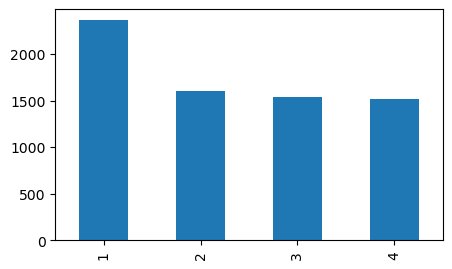




INTERNET_SERVICE_TYPE_ID
2    3096
1    2416
3    1520
Name: internet_service_type_id, dtype: int64
2    0.440273
1    0.343572
3    0.216155
Name: internet_service_type_id, dtype: float64


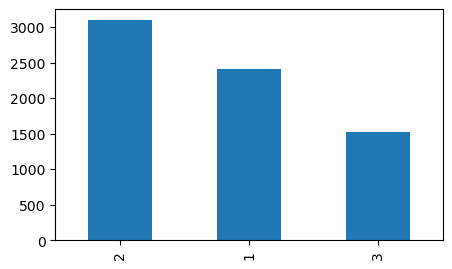




CONTRACT_TYPE_ID
1    3875
3    1685
2    1472
Name: contract_type_id, dtype: int64
1    0.551052
3    0.239619
2    0.209329
Name: contract_type_id, dtype: float64


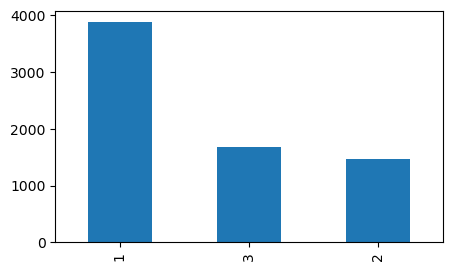




SENIOR_CITIZEN
0    5890
1    1142
Name: senior_citizen, dtype: int64
0    0.8376
1    0.1624
Name: senior_citizen, dtype: float64


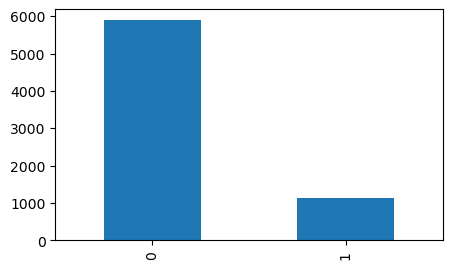




TENURE
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
1     0.087173
72    0.051479
2     0.033845
3     0.028441
4     0.025028
        ...   
38    0.008390
28    0.008106
39    0.007964
44    0.007253
36    0.007110
Name: tenure, Length: 72, dtype: float64


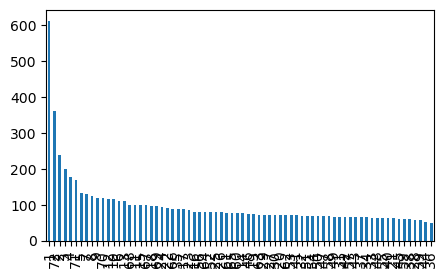




MONTHLY_CHARGES
20.05     61
19.85     44
19.95     44
19.90     44
19.65     43
          ..
47.60      1
35.25      1
115.85     1
112.40     1
67.85      1
Name: monthly_charges, Length: 1584, dtype: int64
20.05     0.008675
19.85     0.006257
19.95     0.006257
19.90     0.006257
19.65     0.006115
            ...   
47.60     0.000142
35.25     0.000142
115.85    0.000142
112.40    0.000142
67.85     0.000142
Name: monthly_charges, Length: 1584, dtype: float64


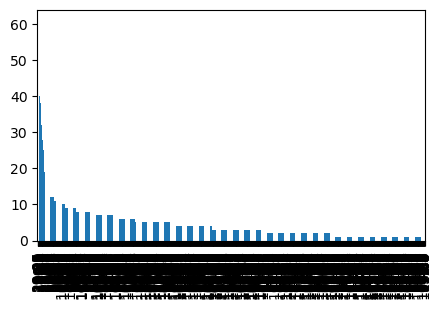




TOTAL_CHARGES
20.20      11
19.75       9
19.90       8
19.65       8
20.05       8
           ..
2387.75     1
6302.80     1
2058.50     1
829.55      1
3707.60     1
Name: total_charges, Length: 6530, dtype: int64
20.20      0.001564
19.75      0.001280
19.90      0.001138
19.65      0.001138
20.05      0.001138
             ...   
2387.75    0.000142
6302.80    0.000142
2058.50    0.000142
829.55     0.000142
3707.60    0.000142
Name: total_charges, Length: 6530, dtype: float64


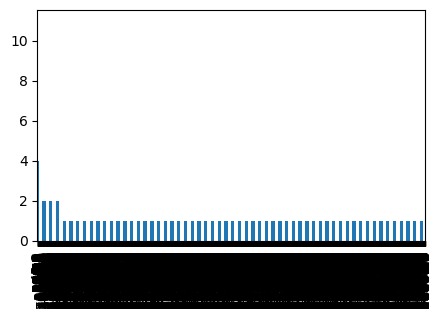




NEW_CUSTOMER_ID
3096    5
621     5
5442    5
4291    5
9391    5
       ..
3933    1
3934    1
3935    1
3936    1
9995    1
Name: new_customer_id, Length: 5078, dtype: int64
3096    0.000711
621     0.000711
5442    0.000711
4291    0.000711
9391    0.000711
          ...   
3933    0.000142
3934    0.000142
3935    0.000142
3936    0.000142
9995    0.000142
Name: new_customer_id, Length: 5078, dtype: float64


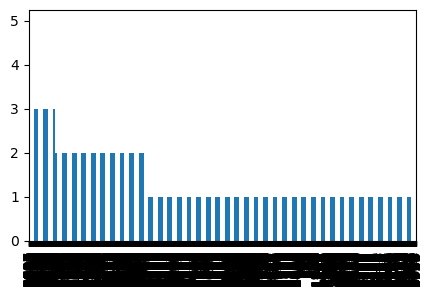

In [72]:
# get value counts for all the numeric colums
for col in numeric_telco:
    plt.figure(figsize=(5,3))
    print(col.upper())
    print(telco[col].value_counts(dropna=False))
    print(telco[col].value_counts(normalize=True))
    telco[col].value_counts( dropna=False).plot.bar()
    plt.show()
    print("\n\n")

In [73]:
# separate numeric from object columns
object_telco = telco.select_dtypes("object").columns
object_telco

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_type',
       'customer_id_category'],
      dtype='object')

GENDER
Male      3549
Female    3483
Name: gender, dtype: int64
Male      0.504693
Female    0.495307
Name: gender, dtype: float64


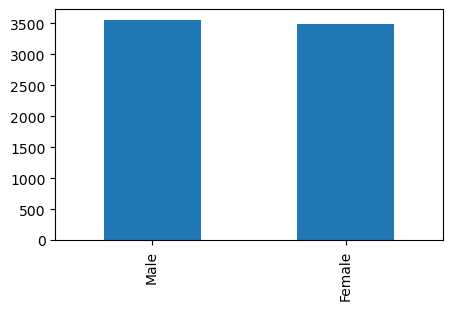




PARTNER
No     3639
Yes    3393
Name: partner, dtype: int64
No     0.517491
Yes    0.482509
Name: partner, dtype: float64


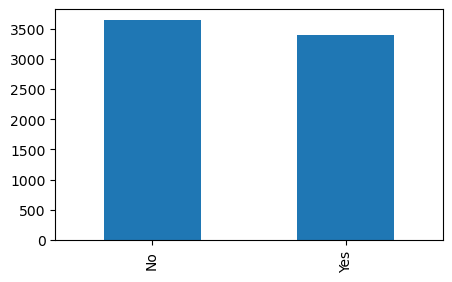




DEPENDENTS
No     4933
Yes    2099
Name: dependents, dtype: int64
No     0.701507
Yes    0.298493
Name: dependents, dtype: float64


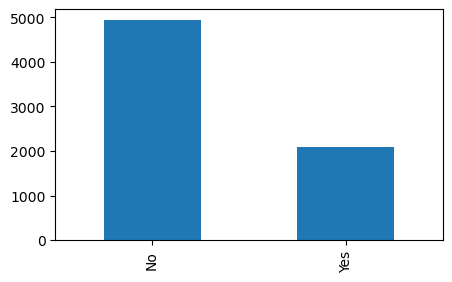




PHONE_SERVICE
Yes    6352
No      680
Name: phone_service, dtype: int64
Yes    0.903299
No     0.096701
Name: phone_service, dtype: float64


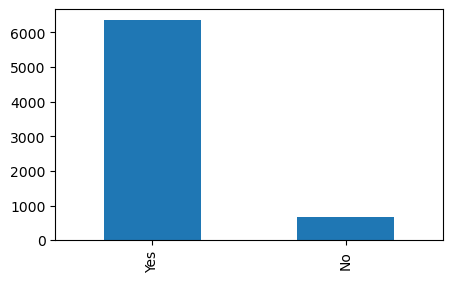




MULTIPLE_LINES
No                  3385
Yes                 2967
No phone service     680
Name: multiple_lines, dtype: int64
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: multiple_lines, dtype: float64


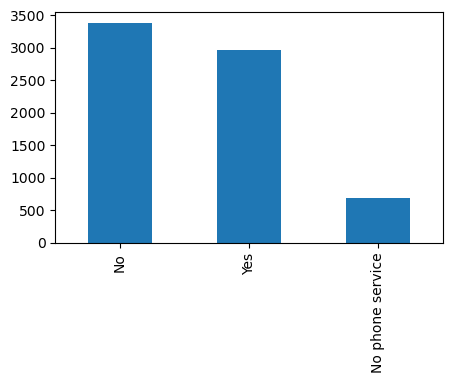




ONLINE_SECURITY
No                     3497
Yes                    2015
No internet service    1520
Name: online_security, dtype: int64
No                     0.497298
Yes                    0.286547
No internet service    0.216155
Name: online_security, dtype: float64


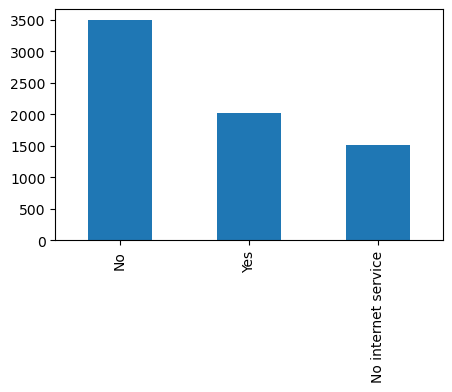




ONLINE_BACKUP
No                     3087
Yes                    2425
No internet service    1520
Name: online_backup, dtype: int64
No                     0.438993
Yes                    0.344852
No internet service    0.216155
Name: online_backup, dtype: float64


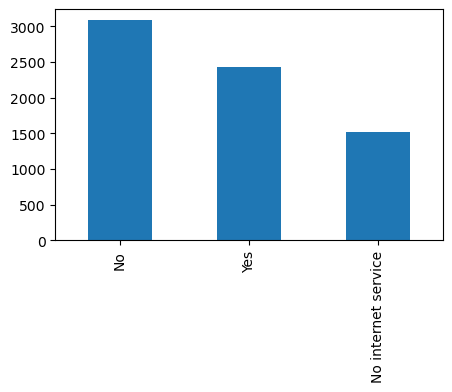




DEVICE_PROTECTION
No                     3094
Yes                    2418
No internet service    1520
Name: device_protection, dtype: int64
No                     0.439989
Yes                    0.343857
No internet service    0.216155
Name: device_protection, dtype: float64


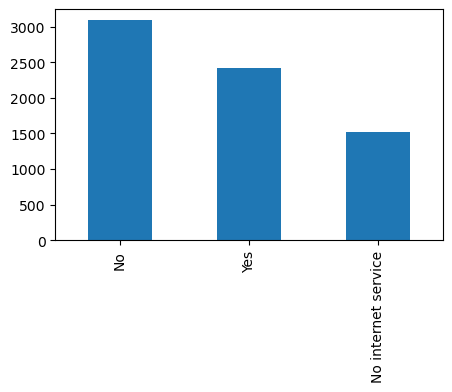




TECH_SUPPORT
No                     3472
Yes                    2040
No internet service    1520
Name: tech_support, dtype: int64
No                     0.493743
Yes                    0.290102
No internet service    0.216155
Name: tech_support, dtype: float64


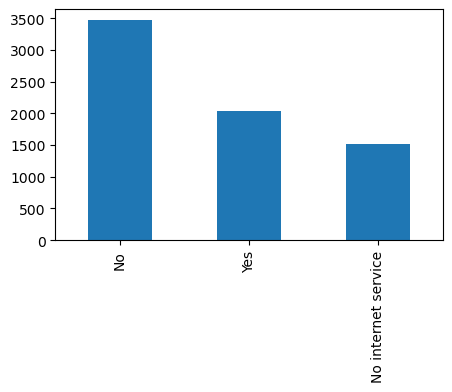




STREAMING_TV
No                     2809
Yes                    2703
No internet service    1520
Name: streaming_tv, dtype: int64
No                     0.399460
Yes                    0.384386
No internet service    0.216155
Name: streaming_tv, dtype: float64


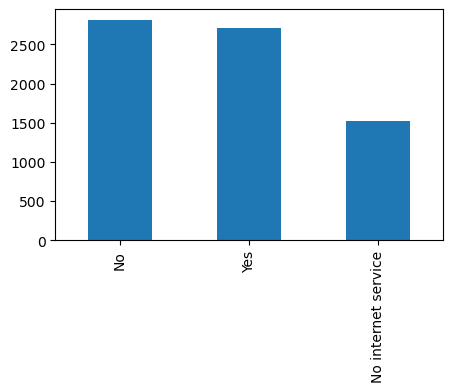




STREAMING_MOVIES
No                     2781
Yes                    2731
No internet service    1520
Name: streaming_movies, dtype: int64
No                     0.395478
Yes                    0.388367
No internet service    0.216155
Name: streaming_movies, dtype: float64


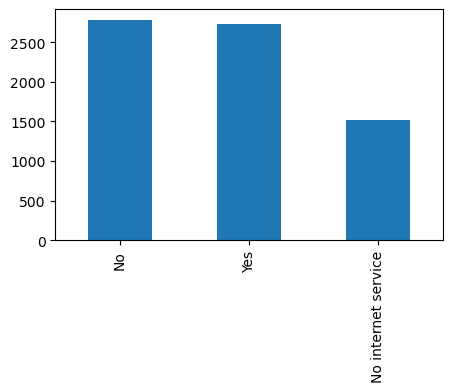




PAPERLESS_BILLING
Yes    4168
No     2864
Name: paperless_billing, dtype: int64
Yes    0.592719
No     0.407281
Name: paperless_billing, dtype: float64


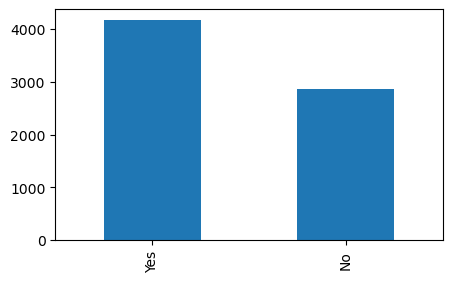




CHURN
No     5163
Yes    1869
Name: churn, dtype: int64
No     0.734215
Yes    0.265785
Name: churn, dtype: float64


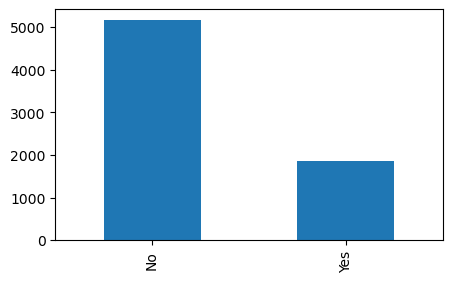




CONTRACT_TYPE
Month-to-month    3875
Two year          1685
One year          1472
Name: contract_type, dtype: int64
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: contract_type, dtype: float64


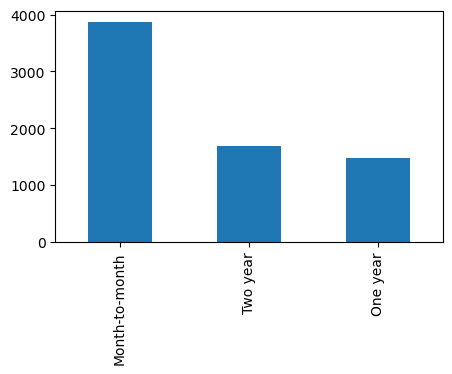




INTERNET_SERVICE_TYPE
Fiber optic    3096
DSL            2416
None           1520
Name: internet_service_type, dtype: int64
Fiber optic    0.440273
DSL            0.343572
None           0.216155
Name: internet_service_type, dtype: float64


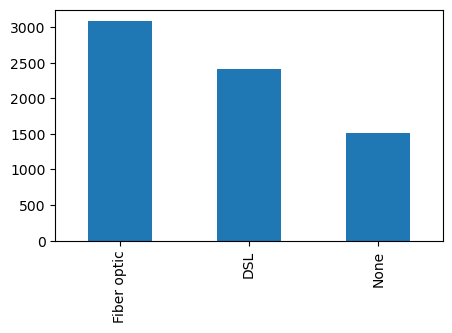




PAYMENT_TYPE
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: payment_type, dtype: int64
Electronic check             0.336320
Mailed check                 0.228100
Bank transfer (automatic)    0.219283
Credit card (automatic)      0.216297
Name: payment_type, dtype: float64


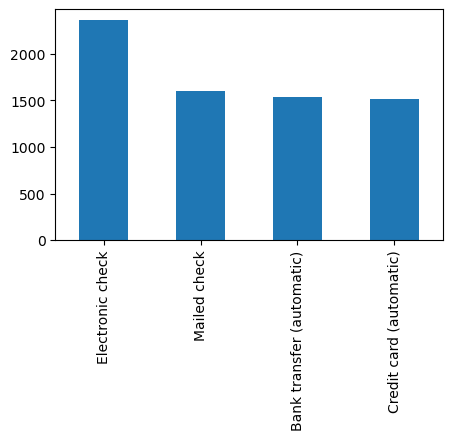




CUSTOMER_ID_CATEGORY
VUVJN    2
CYWMH    2
GSODA    2
RPLQZ    1
LADHQ    1
        ..
DTIVD    1
DSRKA    1
OADJP    1
RICWQ    1
HOTOH    1
Name: customer_id_category, Length: 7029, dtype: int64
VUVJN    0.000284
CYWMH    0.000284
GSODA    0.000284
RPLQZ    0.000142
LADHQ    0.000142
           ...   
DTIVD    0.000142
DSRKA    0.000142
OADJP    0.000142
RICWQ    0.000142
HOTOH    0.000142
Name: customer_id_category, Length: 7029, dtype: float64


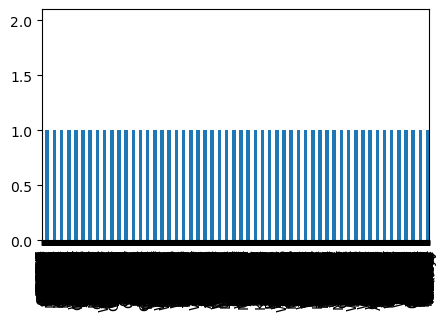

In [74]:
# get value counts for all the numeric colums
for col in object_telco:
    plt.figure(figsize=(5,3))
    print(col.upper())
    print(telco[col].value_counts(dropna=False))
    print(telco[col].value_counts(normalize=True))
    telco[col].value_counts( dropna=False).plot.bar()
    plt.show()
    print("\n\n")

In [82]:
# double check the telco customer groups
telco[telco.customer_id_category.str.contains("CYWMH")]

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,new_customer_id,customer_id_category
988,3,3,1,Female,0,Yes,Yes,22,Yes,No,...,No internet service,No,19.05,454.05,No,Month-to-month,None,Bank transfer (automatic),1431,CYWMH
3112,3,2,1,Male,1,Yes,No,62,Yes,Yes,...,Yes,Yes,89.80,5629.55,No,Month-to-month,Fiber optic,Bank transfer (automatic),4462,CYWMH


In [83]:
# double check the telco customer groups
telco[telco.customer_id_category.str.contains("VUVJN")]

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,new_customer_id,customer_id_category
2038,1,2,2,Female,1,Yes,No,59,Yes,Yes,...,No,Yes,94.05,5483.90,No,One year,Fiber optic,Electronic check,2931,VUVJN
6005,1,2,1,Male,1,No,No,1,Yes,Yes,...,No,Yes,73.65,73.65,Yes,Month-to-month,Fiber optic,Electronic check,8473,VUVJN


In [84]:
# drop duplicates and un necessery columns
drop_cols = ["new_customer_id", "customer_id_category"]

telco = telco.drop(columns=drop_cols, axis=1)
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,Yes,Yes,No,Yes,65.6,593.30,No,One year,DSL,Mailed check
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,No,No,Yes,No,59.9,542.40,No,Month-to-month,DSL,Mailed check
2,1,2,1,Male,0,No,No,4,Yes,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [86]:
# separate numeric from object columns
object_telco = telco.select_dtypes("object").columns
object_telco


Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing', 'churn',
       'contract_type', 'internet_service_type', 'payment_type'],
      dtype='object')

In [87]:
# get dummie variables
all_dummies = pd.get_dummies(telco[object_telco], drop_first=True)
all_dummies.head(3)

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0


In [90]:
# conect dummies to the originaal data
telco = pd.concat([telco,all_dummies], axis=1)
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,Female,0,Yes,Yes,9,Yes,No,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,Male,0,No,No,9,Yes,Yes,...,1,0,0,0,0,0,0,0,0,1
2,1,2,1,Male,0,No,No,4,Yes,No,...,0,1,1,0,0,1,0,0,1,0


**Function**

In [92]:
def prep_telco():
    
    telco = acquire.get_telco()
    
    # remove the non numerics in the total charges from data frame
    print("original size:",len(telco))
    telco = telco[telco.total_charges.str.contains(" ") == False]

    # change the data type of total charges
    telco.total_charges = telco.total_charges.astype("float")
    telco.total_charges.dtype
    
    # drop duplicates and un necessery columns
    drop_cols = ["customer_id"]
    telco = telco.drop(columns=drop_cols, axis=1)

    # separate numeric from object columns
    object_telco = telco.select_dtypes("object").columns
    
    # get dummie variables
    all_dummies = pd.get_dummies(telco[object_telco], drop_first=True)
    
    # conect dummies to the originaal data
    telco = pd.concat([telco,all_dummies], axis=1)
    
    return telco



In [4]:
prepare.prep_telco().head()

original size: 7043


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,0,1,0,1,0,0,0,0,0,1
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,1,0,0,0,0,0,0,0,0,1
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,0,1,1,0,0,1,0,0,1,0
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,1,1,1,0,0,1,0,0,1,0
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,0,1,1,0,0,1,0,0,0,1


# Tidy data

1. Attendance Data

Read the data from the attendance table and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [34]:
attendance = pd.read_csv("untidy-data/attendance.csv")
attendance

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [35]:
# melt the wide data to long
#                              columns I want to keep
attendance = attendance.melt(id_vars="Unnamed: 0")
attendance = attendance.rename(columns={"Unnamed: 0":"name", "value":"attend_class"})
attendance.head(10)

,name,variable,attend_class
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T
5,Jane,2018-01-02,P
6,Billy,2018-01-02,T
7,John,2018-01-02,T
8,Sally,2018-01-03,T
9,Jane,2018-01-03,T


In [36]:
# split the variable column into year, month and day
split_var = attendance.variable.str.split("-", expand=True)
split_var.head(3)

,0,1,2
0,2018,01,01
1,2018,01,01
2,2018,01,01


In [37]:
# add the tree new columns to the attendace dataframe
attendance[["year", "month", "day"]] = split_var

attendance.head(2)

,name,variable,attend_class,year,month,day
0,Sally,2018-01-01,P,2018,01,01
1,Jane,2018-01-01,A,2018,01,01


In [38]:
# remoce the bad year column
attendance = attendance.drop(columns=["variable"], axis=1)

In [50]:
t=0.1
a = t * 10
p = 0.0
h= 0.5

condlist = [attendance.attend_class == "T", attendance.attend_class == "A", attendance.attend_class == "H", attendance.attend_class == "p"]
choicelist = [t, a, h, p]
att_score = np.select(condlist, choicelist)

attendance["attendance_score"] = att_score

In [51]:
attendance.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
name,Sally,Jane,Billy,John,Sally,Jane,Billy,John,Sally,Jane,Billy,John,Sally,Jane,Billy,John,Sally,Jane,Billy,John
attend_class,P,A,A,P,T,P,T,T,T,T,A,H,H,T,A,P,P,T,H,P
year,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
month,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01,01
day,01,01,01,01,02,02,02,02,03,03,03,03,04,04,04,04,05,05,05,05
attendance_score,0.0,1.0,1.0,0.0,0.1,0.0,0.1,0.1,0.1,0.1,1.0,0.5,0.5,0.1,1.0,0.0,0.0,0.1,0.5,0.0


In [71]:
# attendance scores
1 - (attendance.groupby("name").attendance_score.agg("mean").sort_values())

name
John     0.9125
Sally    0.7625
Jane     0.6875
Billy    0.5250
Name: attendance_score, dtype: float64

2. Coffee Levels

- Read the coffee_levels table.
- Transform the data so that each carafe is in it's own column.
- Is this the best shape for the data?

In [58]:
coffee_levels = pd.read_csv("untidy-data/coffee_levels.csv")
coffee_levels.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


In [63]:
coffee_levels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hour           30 non-null     int64  
 1   coffee_carafe  30 non-null     object 
 2   coffee_amount  30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


In [60]:
coffee_levels.coffee_carafe.value_counts()

x    10
y    10
z    10
Name: coffee_carafe, dtype: int64

In [94]:
coffee_levels.pivot_table(index= "hour", # value we want to keep as rows
                          columns="coffee_carafe", # value we taking up to columns
                          values= "coffee_amount")

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


3. Cake Recipes

- Read the cake_recipes table. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
- Tidy the data as necessary.
- Which recipe, on average, is the best?
- Which oven temperature, on average, produces the best results?
- Which combination of recipe, rack position, and temperature gives the best result?

In [100]:
cake_recipes = pd.read_csv("untidy-data/cake_recipes.csv")
cake_recipes.head()

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084


In [101]:
cake_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recipe:position  8 non-null      object 
 1   225              8 non-null      float64
 2   250              8 non-null      float64
 3   275              8 non-null      float64
 4   300              8 non-null      float64
dtypes: float64(4), object(1)
memory usage: 448.0+ bytes


In [102]:
cake_recipes.columns

Index(['recipe:position', '225', '250', '275', '300'], dtype='object')

In [105]:
cake_recipes['recipe:position'].value_counts()

a:bottom    1
a:top       1
b:bottom    1
b:top       1
c:bottom    1
c:top       1
d:bottom    1
d:top       1
Name: recipe:position, dtype: int64

In [106]:
# separate the unclean data to differenc columns
recip_sep = cake_recipes['recipe:position'].str.split(":", expand=True)
recip_sep.head()

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom


In [109]:
# remove the split column
cake_recipes = cake_recipes.drop(columns="recipe:position", axis=1)

# add the created columns to the cake data frame
cake_recipes[["recipe", "position"]]= recip_sep
cake_recipes.head(2)

,225,250,275,300,recipe,position
0,61.738655,53.912627,74.414730,98.786784,a,bottom
1,51.709751,52.009735,68.576858,50.228470,a,top


In [111]:
cols = cake_recipes.columns
cols

Index(['225', '250', '275', '300', 'recipe', 'position'], dtype='object')

In [118]:
# melt the wide format to long of the tempretures
cake_recipes = cake_recipes.melt(id_vars= ["recipe", "position"],
                  var_name="temperature",
                  value_name= 'tastiness'
                 )
cake_recipes.head()

,recipe,position,temperature,tastiness
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207


In [126]:
# Which recipe, on average, is the best?
cake_recipes.groupby("recipe").tastiness.agg("mean").sort_values().tail(1)

recipe
b    76.736074
Name: tastiness, dtype: float64

In [129]:
# Which oven temperature, on average, produces the best results?
cake_recipes.groupby("temperature").tastiness.agg("mean").sort_values().tail(1)

temperature
275    74.886754
Name: tastiness, dtype: float64

# EDA

In [3]:
# acquire data
iris = acquire.get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [4]:
permutaions = list(itertools.permutations(iris.columns[2:],2))

In [6]:
train, validate, test = prepare.split_data_(df=iris, stratify_col="species_name", random_state=95)

In [9]:
train.head(3)

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
76,77,6.8,2.8,4.8,1.4,2,2,versicolor
132,133,6.4,2.8,5.6,2.2,3,3,virginica
4,5,5.0,3.6,1.4,0.2,1,1,setosa


(array([ 6., 17.,  7., 17., 10., 10., 13.,  3.,  3.,  4.]),
 array([4.4 , 4.75, 5.1 , 5.45, 5.8 , 6.15, 6.5 , 6.85, 7.2 , 7.55, 7.9 ]),
 <BarContainer object of 10 artists>)

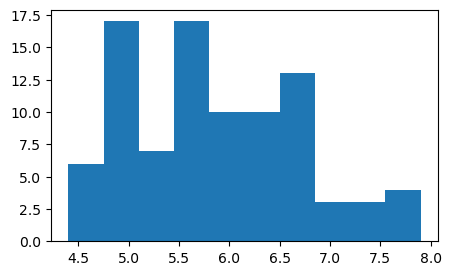

In [13]:
# separeate discrete from continuous variables
numeric_col = train.select_dtypes("number").columns

categorical_col = train.select_dtypes("object").columns

In [ ]:
for i in train_col[2:]:
    print(i.upper())
    print(i.value_counts())
    plt.figure(figsize=(5,3))
    plt.hist(train.sepal_length)